In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = np.loadtxt('planet1_rv.txt')
jd, rv, e = raw[:, 0], raw[:, 1], raw[:, 2]

In [3]:
from astropy.timeseries import LombScargle
import astropy.units as u

<ErrorbarContainer object of 3 artists>

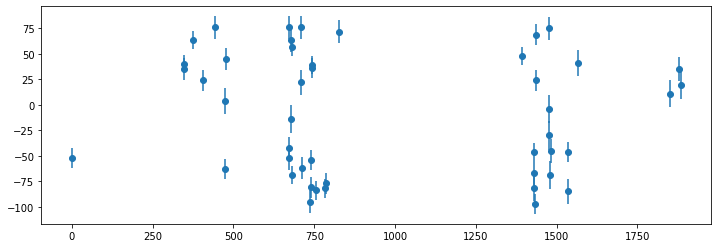

In [4]:
f, ax = plt.subplots(figsize=(12, 4))
ax.errorbar(jd - jd[0], rv, yerr=e, fmt = 'o')

0.2837085470167579


<ErrorbarContainer object of 3 artists>

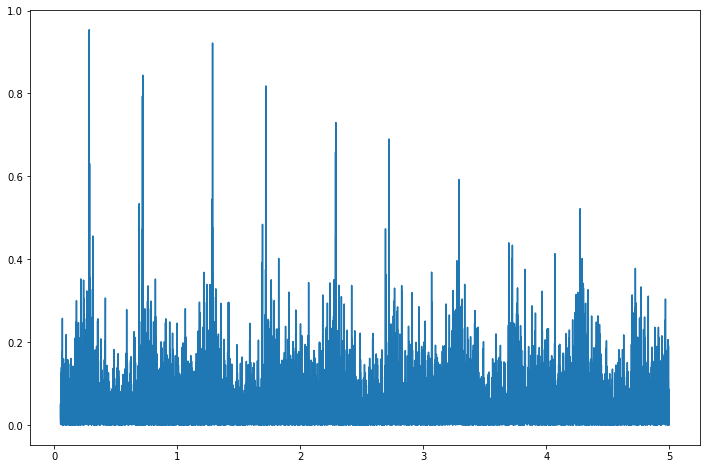

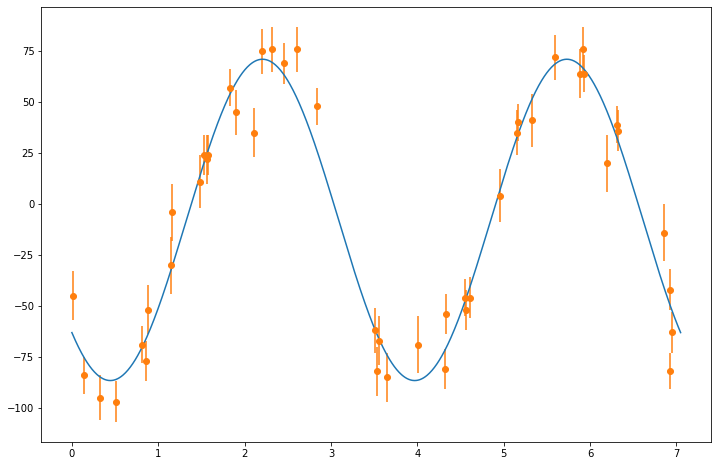

In [5]:
fre, power = LombScargle(jd, rv, dy=e).autopower(minimum_frequency=0.05,
                                           maximum_frequency=5,
                                           samples_per_peak=100)
plt.figure(figsize=(12, 8))
plt.plot(fre, power)
best_frequency = fre[power.argmax()]
print(best_frequency)
LS = LombScargle(jd, rv, fit_mean=True)
t_fit = np.linspace(0, 1 / best_frequency * 2, 1000)
y_fit = LS.model(t_fit, best_frequency)
plt.figure(figsize=(12, 8))
plt.plot(t_fit, y_fit)
plt.errorbar((jd) % (1 / best_frequency * 2), rv, yerr=e, fmt='o')

0.2837085470167579


<ErrorbarContainer object of 3 artists>

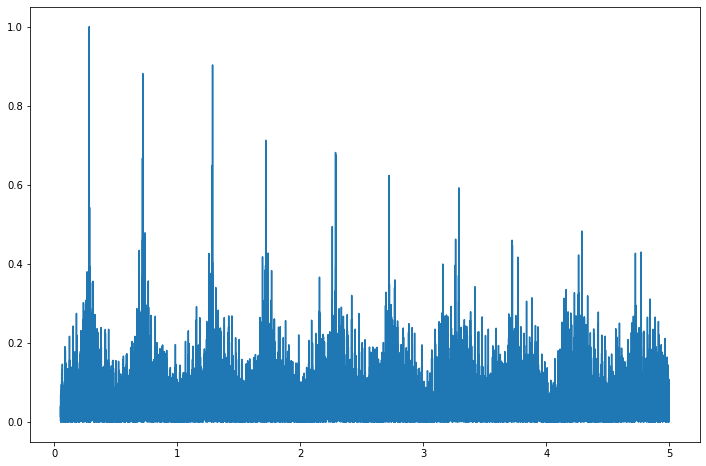

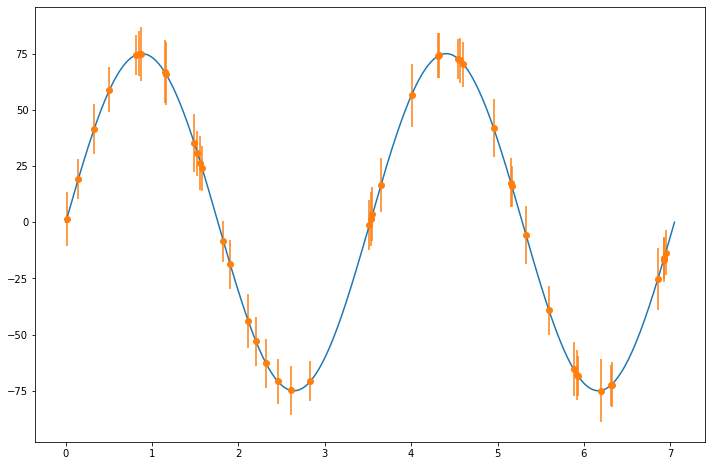

In [18]:
rv_comb = 75*np.sin(2*np.pi*0.2837085470167579*jd)#np.ones(len(rv))
fre, power = LombScargle(jd, rv_comb).autopower(minimum_frequency=0.05,
                                           maximum_frequency=5,
                                           samples_per_peak=100)
plt.figure(figsize=(12, 8))
plt.plot(fre, power)
best_frequency = fre[power.argmax()]
print(best_frequency)
LS = LombScargle(jd, rv_comb, fit_mean=True)
t_fit = np.linspace(0, 1 / best_frequency * 2, 1000)
y_fit = LS.model(t_fit, best_frequency)
plt.figure(figsize=(12, 8))
plt.plot(t_fit, y_fit)
plt.errorbar((jd) % (1 / best_frequency * 2), rv_comb, yerr=e, fmt='o')

1.283707432273644


<ErrorbarContainer object of 3 artists>

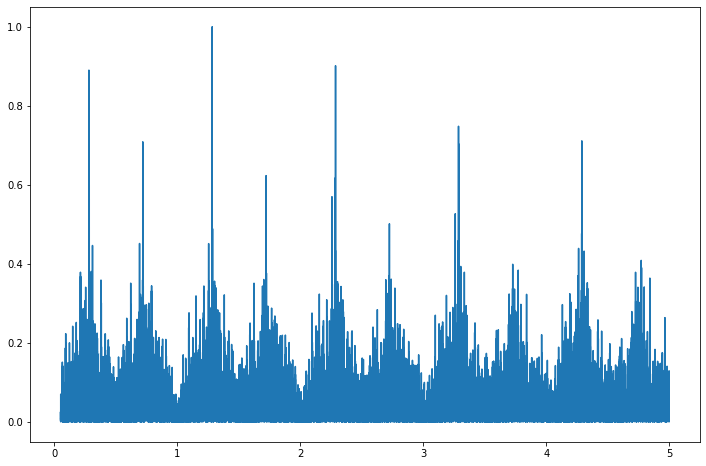

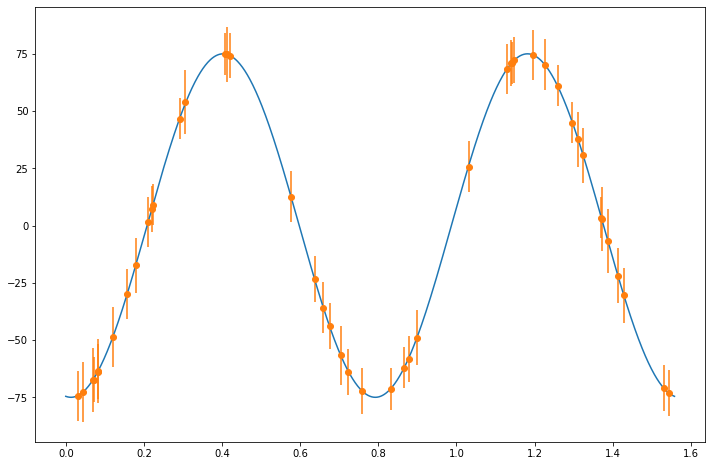

In [21]:
rv_comb = 75*np.sin(2*np.pi*1.2837085470167579*jd)#np.ones(len(rv))
fre, power = LombScargle(jd, rv_comb).autopower(minimum_frequency=0.05,
                                           maximum_frequency=5,
                                           samples_per_peak=100)
plt.figure(figsize=(12, 8))
plt.plot(fre, power)
best_frequency = fre[power.argmax()]
print(best_frequency)
LS = LombScargle(jd, rv_comb, fit_mean=True)
t_fit = np.linspace(0, 1 / best_frequency * 2, 1000)
y_fit = LS.model(t_fit, best_frequency)
plt.figure(figsize=(12, 8))
plt.plot(t_fit, y_fit)
plt.errorbar((jd) % (1 / best_frequency * 2), rv_comb, yerr=e, fmt='o')

# RV 拟合

$$
RV(t)=v\sin(\omega t+\phi_0)+v_0=v\sin\omega t\cos\phi_0+v\cos\omega t\sin\phi_0+v_0
$$

其中的 $v$ 和 $\omega$ 与初相位 $\phi_0$ 耦合在一起，无法同时通过线性回归得到

为此，我们固定 $v$ 和 $\omega$，用线性回归估计 $\phi_0$ 和 $v_0$，进而在参数空间 $(v,\omega)$ 中寻找残差最小的点，作为 $v$ 和 $\omega$ 的估计

首先考虑线性模型

$$
Y=K_1X_1+K_2X_2+K_0
$$

我们已经获取了 $n$ 组数据，$(x_{1,i}, x_{2,i}, y_i),\ i=1,2,\cdot,n$，希望选取 $K_1,K_2,K_0$ 使得残差平方和

$$
\sum_{i=1}^n(K_1x_{1,i}+K_2x_{2,i}+K_0-y_i)^2
$$

最小，则必有该残差平方和相对 $K_0,K_1,K_2$ 的偏导数各自为零，即

$$
\left\{
\begin{array}{cc}
\sum_{i=1}^n(K_1x_{1,i}+K_2x_{2,i}+K_0-y_i)x_{1,i}=0\\
\sum_{i=1}^n(K_1x_{1,i}+K_2x_{2,i}+K_0-y_i)x_{2,i}=0\\
\sum_{i=1}^n(K_1x_{1,i}+K_2x_{2,i}+K_0-y_i)=0\\
\end{array}
\right.
$$

记

$$
\sum_{i=1}^nx_{1,i}=X_{1},\quad \sum_{i=1}^nx_{2,i}=X_{2},\quad \sum_{i=1}^ny_{i}=Y
$$

$$
\sum_{i=1}^nx_{1,i}^2=XX_{11},\quad \sum_{i=1}^nx_{2,i}^2=XX_{22},\quad \sum_{i=1}^nx_{1,i}x_{2,i}=XX_{12}
$$

$$
\sum_{i=1}^ny_ix_{1,i}=YX_{1},\quad \sum_{i=1}^ny_ix_{2,i}=YX_{2}
$$

则方程组简化为

$$
\left\{
\begin{array}{c}
K_1XX_{11}+K_2XX_{12}+K_0X_1-YX_1=0\\
K_1XX_{12}+K_2XX_{22}+K_0X_2-YX_2=0\\
K_1X_1+K_2X_2+K_0-Y=0\\
\end{array}
\right.
\Leftrightarrow 
\left(
\begin{array}{ccc}
XX_{11} & XX_{12} & X_1\\
XX_{12} & XX_{22} & X_2\\
X_{1} & X_{2} & 1\\
\end{array}
\right)
\left(
\begin{array}{c}
K_1\\K_2\\K_0
\end{array}
\right)
=
\left(
\begin{array}{c}
YX_1\\YX_2\\Y
\end{array}
\right)
$$

可以解得

$$
\left(
\begin{array}{c}
K_1\\K_2\\K_0
\end{array}
\right)
=
\left(
\begin{array}{ccc}
XX_{11} & XX_{12} & X_1\\
XX_{12} & XX_{22} & X_2\\
X_{1} & X_{2} & 1\\
\end{array}
\right)^{-1}
\left(
\begin{array}{c}
YX_1\\YX_2\\Y
\end{array}
\right)
$$

进而计算残差平方和

在我们的模型中，

$$
x_{1,i}=v\sin(\omega t_i),\quad x_{2,i}=v\cos(\omega t_i)
$$

$$
K_0=v_0, \quad K_1=\cos\phi_0, \quad K_2=\sin\phi_0
$$

$$
y_{i}=RV(t_i)
$$

据此进行回归运算

In [182]:
v_temp = np.linspace(-rv.min(), rv.max(), 100)
v_temp = np.linspace(70, 82, 100)
omega_temp = 2 * np.pi * np.linspace(2e-1, 5, 100)
v_t = np.array([])
omega_t = np.array([])
K1_t, K2_t, K0_t = np.array([]), np.array([]), np.array([])
res_t = np.array([])
for v in v_temp:
    for omega in omega_temp:
        x1 = v*np.sin(omega*jd)
        x2 = v*np.cos(omega*jd)
        y = rv
        
        XX11 = (x1**2).sum()
        XX12 = (x1 * x2).sum()
        XX22 = (x2**2).sum()
        X1 = x1.sum()
        X2 = x2.sum()
        YX1 = (y * x1).sum()
        YX2 = (y * x2).sum()
        Y = y.sum()
        
        MatX = np.matrix([[XX11, XX12, X1], [XX12, XX22, X2], [X1, X2, 1]])
        MatY = np.matrix([[YX1], [YX2], [Y]])
        MatK = MatX**(-1) * MatY
        
        K1, K2, K0 = float(MatK[0]), float(MatK[1]), float(MatK[2])
        
        res = ((K1*x1 + K2*x2 + K0 - y)**2).sum()
        
        v_t = np.append(v_t, v)
        omega_t = np.append(omega_t, omega)
        K1_t, K2_t, K0_t = np.append(K1_t, K1), np.append(K2_t, K2), np.append(K0_t, K0)
        res_t = np.append(res_t, res)

In [183]:
arg = res_t.argmin()

v_t[arg], 2*np.pi/omega_t[arg]

(75.0909090909091, 0.5871886120996442)

In [184]:
K1_t[arg], K2_t[arg], K0_t[arg], K1_t[arg]**2+K2_t[arg]**2

(-0.25203247212955127,
 -0.19679942141982504,
 3.3641057072367815,
 0.10225037927891092)

Text(0.5, 0, 'V (km/s)')

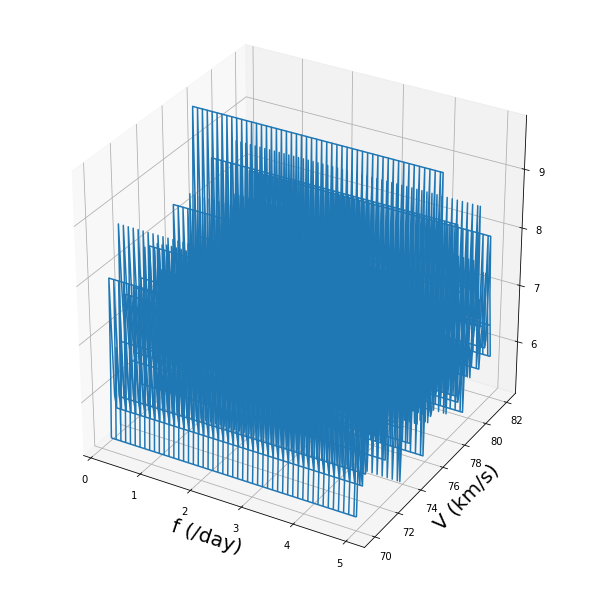

In [185]:
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
f, ax = plt.subplots(figsize=(8, 8), sharex='row')
ax = Axes3D(f)

V, Omega = np.meshgrid(v_temp, omega_temp)
ax.plot_wireframe(X=Omega / 2 / np.pi, Y=V, Z=np.log10(res_t.reshape(100, 100)))
ax.set_xlabel('f (/day)', fontsize=20)
ax.set_ylabel('V (km/s)', fontsize=20)